<a href="https://colab.research.google.com/github/jiten-p14/SepsisDetection/blob/master/Sepsis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data**

In [0]:
!pip install tensorflow==2.0.0

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, \
average_precision_score, precision_recall_curve, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from keras.layers import Dense, Input
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
import lightgbm as lgb
import seaborn as sns
from subprocess import call
from IPython.display import Image
import warnings
import os
from os import listdir
import glob
warnings.filterwarnings('ignore')

In [0]:
!mkdir testingData

In [6]:
#Extracting files
!unzip /content/training_setA.zip
!unzip /content/training_setB.zip

Archive:  /content/training_setA.zip
   creating: training/
  inflating: training/p000001.psv    
  inflating: training/p000002.psv    
  inflating: training/p000003.psv    
  inflating: training/p000004.psv    
  inflating: training/p000005.psv    
  inflating: training/p000006.psv    
  inflating: training/p000007.psv    
  inflating: training/p000008.psv    
  inflating: training/p000009.psv    
  inflating: training/p000010.psv    
  inflating: training/p000011.psv    
  inflating: training/p000012.psv    
  inflating: training/p000013.psv    
  inflating: training/p000014.psv    
  inflating: training/p000015.psv    
  inflating: training/p000016.psv    
  inflating: training/p000017.psv    
  inflating: training/p000018.psv    
  inflating: training/p000019.psv    
  inflating: training/p000020.psv    
  inflating: training/p000021.psv    
  inflating: training/p000022.psv    
  inflating: training/p000023.psv    
  inflating: training/p000024.psv    
  inflating: training/p00002

In [0]:
def readingFiles():
  extension = 'csv'
  all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
  #combine all files in the list
  combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
  #export to csv
  combined_csv.to_csv( 'merege.csv', index=False, encoding='utf-8-sig')

In [0]:
os.chdir('/content/training')
!pwd
readingFiles()

/content/training


In [0]:
os.chdir('/content/training_setB')
!pwd
readingFiles()

/content/training_setB


In [0]:
os.chdir('/content/training')
data1 = pd.read_csv("data1.csv",sep='|')
data1.head()

HR  O2Sat  Temp    SBP  ...  Unit2  HospAdmTime  ICULOS  SepsisLabel
0    NaN    NaN   NaN    NaN  ...    NaN      -135.03       1            0
1  123.5   98.0   NaN  113.5  ...    NaN      -135.03       2            0
2  117.5   99.0   NaN   93.0  ...    NaN      -135.03       3            0
3  116.0   94.0   NaN   91.0  ...    NaN      -135.03       4            0
4  113.0   97.0   NaN   89.0  ...    NaN      -135.03       5            0

[5 rows x 41 columns]

In [0]:
os.chdir('/content/training_setB')
data2 = pd.read_csv("data2.csv",sep='|')
data2.head()

HR  O2Sat  Temp    SBP  ...  Unit2  HospAdmTime  ICULOS  SepsisLabel
0   NaN    NaN   NaN    NaN  ...    0.0        -2.05       1            0
1  88.0   99.0  35.8  142.0  ...    0.0        -2.05       2            0
2  89.0   99.0   NaN  147.0  ...    0.0        -2.05       3            0
3  83.0   96.0   NaN  134.0  ...    0.0        -2.05       4            0
4  85.0   97.0   NaN  137.0  ...    0.0        -2.05       5            0

[5 rows x 41 columns]

In [0]:
!cp /content/training/data1.csv /content/testingData

In [0]:
!cp /content/training_setB/data2.csv /content/testingData

In [0]:
os.chdir('/content/testingData')
readingFiles()
!ls

data1.csv  data2.csv  merege.csv


In [0]:
df = pd.read_csv('merege.csv', sep='|')
df

HR  O2Sat  Temp    SBP  ...  Unit2  HospAdmTime  ICULOS  SepsisLabel
0          NaN    NaN   NaN    NaN  ...    NaN      -135.03       1            0
1        123.5   98.0   NaN  113.5  ...    NaN      -135.03       2            0
2        117.5   99.0   NaN   93.0  ...    NaN      -135.03       3            0
3        116.0   94.0   NaN   91.0  ...    NaN      -135.03       4            0
4        113.0   97.0   NaN   89.0  ...    NaN      -135.03       5            0
...        ...    ...   ...    ...  ...    ...          ...     ...          ...
1552205    NaN    NaN   NaN    NaN  ...    NaN       -85.22      28            0
1552206   76.0    NaN  36.5  143.0  ...    NaN       -85.22      29            0
1552207    NaN    NaN   NaN    NaN  ...    NaN       -85.22      30            0
1552208   82.0    NaN   NaN  114.0  ...    NaN       -85.22      31            0
1552209   84.0   98.0  36.3  157.5  ...    NaN       -85.22      32            0

[1552210 rows x 41 columns]

In [0]:
df.shape

(1552210, 41)

In [0]:
df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [0]:
df['SepsisLabel'].value_counts()

0    1524294
1      27916
Name: SepsisLabel, dtype: int64

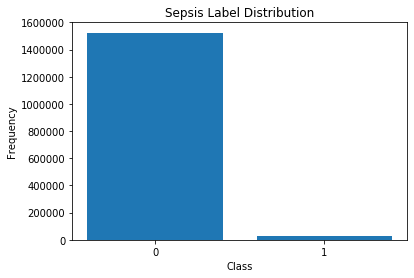

In [0]:
plt.bar(df['SepsisLabel'].value_counts().index, df['SepsisLabel'].value_counts())
plt.xticks([0, 1])
plt.xlabel('Class')
plt.title('Sepsis Label Distribution')
_ = plt.ylabel('Frequency')

In [0]:
df.describe()

HR         O2Sat  ...        ICULOS   SepsisLabel
count  1.398811e+06  1.349474e+06  ...  1.552210e+06  1.552210e+06
mean   8.458144e+01  9.719395e+01  ...  2.699499e+01  1.798468e-02
std    1.732524e+01  2.936924e+00  ...  2.900542e+01  1.328956e-01
min    2.000000e+01  2.000000e+01  ...  1.000000e+00  0.000000e+00
25%    7.200000e+01  9.600000e+01  ...  1.100000e+01  0.000000e+00
50%    8.350000e+01  9.800000e+01  ...  2.100000e+01  0.000000e+00
75%    9.550000e+01  9.950000e+01  ...  3.400000e+01  0.000000e+00
max    2.800000e+02  1.000000e+02  ...  3.360000e+02  1.000000e+00

[8 rows x 41 columns]

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 41 columns):
HR                  1398811 non-null float64
O2Sat               1349474 non-null float64
Temp                525226 non-null float64
SBP                 1325945 non-null float64
MAP                 1358940 non-null float64
DBP                 1065656 non-null float64
Resp                1313875 non-null float64
EtCO2               57636 non-null float64
BaseExcess          84145 non-null float64
HCO3                65028 non-null float64
FiO2                129365 non-null float64
pH                  107573 non-null float64
PaCO2               86301 non-null float64
SaO2                53561 non-null float64
AST                 25183 non-null float64
BUN                 106568 non-null float64
Alkalinephos        24941 non-null float64
Calcium             91331 non-null float64
Chloride            70466 non-null float64
Creatinine          94616 non-null float64
Bilirubin_d

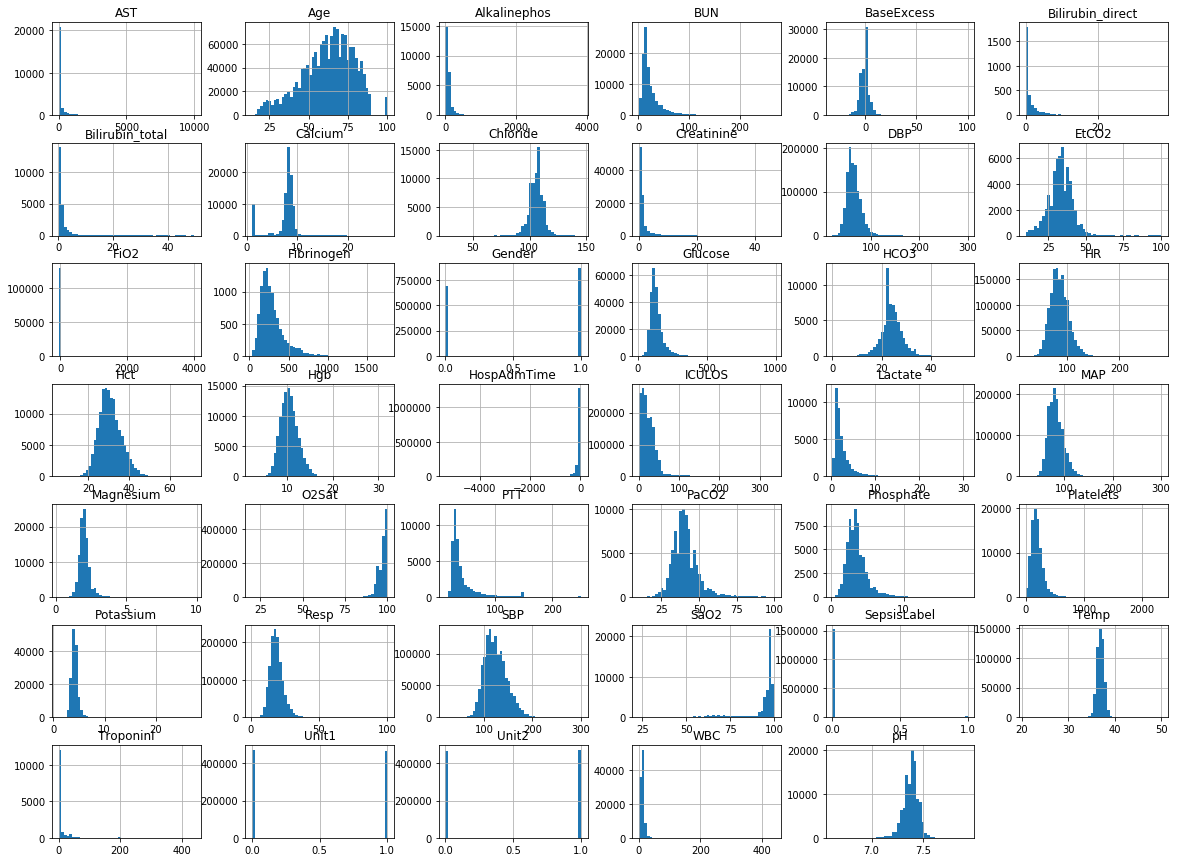

In [0]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [0]:
df.query('SepsisLabel==0')

HR  O2Sat  Temp    SBP  ...  Unit2  HospAdmTime  ICULOS  SepsisLabel
0          NaN    NaN   NaN    NaN  ...    NaN      -135.03       1            0
1        123.5   98.0   NaN  113.5  ...    NaN      -135.03       2            0
2        117.5   99.0   NaN   93.0  ...    NaN      -135.03       3            0
3        116.0   94.0   NaN   91.0  ...    NaN      -135.03       4            0
4        113.0   97.0   NaN   89.0  ...    NaN      -135.03       5            0
...        ...    ...   ...    ...  ...    ...          ...     ...          ...
1552205    NaN    NaN   NaN    NaN  ...    NaN       -85.22      28            0
1552206   76.0    NaN  36.5  143.0  ...    NaN       -85.22      29            0
1552207    NaN    NaN   NaN    NaN  ...    NaN       -85.22      30            0
1552208   82.0    NaN   NaN  114.0  ...    NaN       -85.22      31            0
1552209   84.0   98.0  36.3  157.5  ...    NaN       -85.22      32            0

[1524294 rows x 41 columns]

In [0]:
df_copy = df.copy()

In [0]:
df_copy2 = df_copy.copy()
print('done')

done


In [0]:
df_copy.shape

(1552210, 41)

In [0]:
df = df.drop(df_copy.query('SepsisLabel==0').sample(frac=0.90).index)
print('done')

done


In [0]:
df

HR  O2Sat  Temp    SBP  ...  Unit2  HospAdmTime  ICULOS  SepsisLabel
11       113.0   97.0   NaN   87.0  ...    NaN      -135.03      12            0
14       110.0   97.0   NaN  111.0  ...    NaN      -135.03      15            0
40        78.0  100.0   NaN   96.5  ...    NaN       -13.66       4            0
41        89.0  100.0   NaN   98.0  ...    NaN       -13.66       5            0
46        81.0  100.0   NaN  106.0  ...    NaN       -13.66      10            0
...        ...    ...   ...    ...  ...    ...          ...     ...          ...
1552176   83.0   97.0  35.5  110.0  ...    NaN        -2.43      30            0
1552180   82.0   99.0   NaN  188.0  ...    NaN       -85.22       3            0
1552194   80.0   98.0  37.2  136.0  ...    NaN       -85.22      17            0
1552196   78.0   97.0   NaN  126.0  ...    NaN       -85.22      19            0
1552201    NaN    NaN   NaN    NaN  ...    NaN       -85.22      24            0

[180345 rows x 41 columns]

In [0]:
df.shape

(180345, 41)

In [0]:
df['SepsisLabel'].value_counts()

0    152429
1     27916
Name: SepsisLabel, dtype: int64

In [0]:
df.describe()

HR          O2Sat  ...         ICULOS    SepsisLabel
count  163034.000000  157476.000000  ...  180345.000000  180345.000000
mean       85.501398      97.162736  ...      31.085270       0.154792
std        17.692317       2.960953  ...      36.349754       0.361707
min        20.000000      28.000000  ...       1.000000       0.000000
25%        73.000000      96.000000  ...      11.000000       0.000000
50%        84.000000      98.000000  ...      22.000000       0.000000
75%        97.000000      99.500000  ...      37.000000       0.000000
max       221.000000     100.000000  ...     336.000000       1.000000

[8 rows x 41 columns]

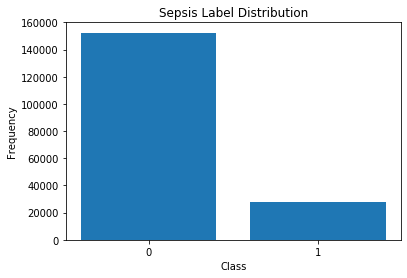

In [0]:
plt.bar(df['SepsisLabel'].value_counts().index, df['SepsisLabel'].value_counts())
plt.xticks([0, 1])
plt.xlabel('Class')
plt.title('Sepsis Label Distribution')
_ = plt.ylabel('Frequency')

In [0]:
corr_matrix = df.corr()
corr_matrix['SepsisLabel']

HR                  0.129192
O2Sat              -0.024708
Temp                0.124778
SBP                -0.036096
MAP                -0.051281
DBP                -0.048930
Resp                0.120325
EtCO2              -0.031833
BaseExcess          0.031351
HCO3               -0.043016
FiO2                0.064240
pH                 -0.010305
PaCO2               0.030414
SaO2                0.025039
AST                 0.007759
BUN                 0.133430
Alkalinephos        0.039891
Calcium            -0.098926
Chloride           -0.023398
Creatinine          0.078424
Bilirubin_direct    0.132587
Glucose             0.023284
Lactate             0.006638
Magnesium           0.015067
Phosphate           0.053264
Potassium           0.012524
Bilirubin_total     0.099076
TroponinI           0.025509
Hct                -0.040582
Hgb                -0.049842
PTT                 0.052080
WBC                 0.095774
Fibrinogen          0.126477
Platelets          -0.026141
Age           

In [0]:
missing = (df.isnull().sum() / df.shape[0]) * 100
missing

HR                   9.598824
O2Sat               12.680695
Temp                66.296265
SBP                 14.604785
MAP                 12.005323
DBP                 31.078766
Resp                15.209182
EtCO2               95.319526
BaseExcess          93.900579
HCO3                95.553522
FiO2                90.418365
pH                  92.178325
PaCO2               93.632759
SaO2                96.145721
AST                 98.170728
BUN                 92.885858
Alkalinephos        98.182373
Calcium             93.760847
Chloride            95.170368
Creatinine          93.709834
Bilirubin_direct    99.762123
Glucose             82.754720
Lactate             96.701322
Magnesium           93.471957
Phosphate           95.764230
Potassium           90.233719
Bilirubin_total     98.333195
TroponinI           99.027974
Hct                 90.879703
Hgb                 92.346891
PTT                 96.852699
WBC                 93.364385
Fibrinogen          99.266961
Platelets 

Text(0.5, 1.0, 'Percentage of missing data in each feature')

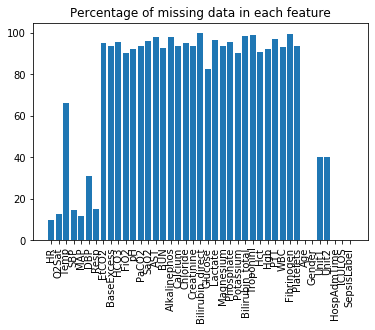

In [0]:
_ = plt.bar(missing.index, missing)
_ = plt.xticks(missing.index, rotation=90)

plt.title("Percentage of missing data in each feature")

In [0]:
df.head(10)

HR  O2Sat  Temp    SBP  ...  Unit2  HospAdmTime  ICULOS  SepsisLabel
11  113.0   97.0   NaN   87.0  ...    NaN      -135.03      12            0
14  110.0   97.0   NaN  111.0  ...    NaN      -135.03      15            0
40   78.0  100.0   NaN   96.5  ...    NaN       -13.66       4            0
41   89.0  100.0   NaN   98.0  ...    NaN       -13.66       5            0
46   81.0  100.0   NaN  106.0  ...    NaN       -13.66      10            0
47   85.0  100.0  37.5  123.5  ...    NaN       -13.66      11            0
72  145.0   95.0   NaN   91.0  ...    0.0      -549.80      16            1
73  138.0   96.0   NaN   97.0  ...    0.0      -549.80      17            1
74  131.0   97.5   NaN   94.5  ...    0.0      -549.80      18            1
75  128.0  100.0   NaN  102.0  ...    0.0      -549.80      19            1

[10 rows x 41 columns]

In [0]:
y = df.SepsisLabel
x = df.drop('SepsisLabel', axis=1)

In [0]:
x.shape

(180345, 40)

In [0]:
y.shape

(180345,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=14)

In [0]:
print("For X_train")
X_train.shape

For X_train


(135258, 40)

In [0]:
print('For X_test')
X_test.shape

For X_test


(45087, 40)

In [0]:
print("For Y_train")
y_train.shape

For Y_train


(135258,)

In [0]:
print("For Y_test")
y_test.shape

For Y_test


(45087,)

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135258 entries, 547977 to 995923
Data columns (total 40 columns):
HR                  122308 non-null float64
O2Sat               118199 non-null float64
Temp                45666 non-null float64
SBP                 115642 non-null float64
MAP                 119132 non-null float64
DBP                 93346 non-null float64
Resp                114712 non-null float64
EtCO2               6352 non-null float64
BaseExcess          8219 non-null float64
HCO3                5978 non-null float64
FiO2                12962 non-null float64
pH                  10536 non-null float64
PaCO2               8573 non-null float64
SaO2                5200 non-null float64
AST                 2479 non-null float64
BUN                 9570 non-null float64
Alkalinephos        2463 non-null float64
Calcium             8408 non-null float64
Chloride            6499 non-null float64
Creatinine          8473 non-null float64
Bilirubin_direct    319 non-nu

In [0]:
sm = SMOTE(random_state=14, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

ValueError: ignored

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

ValueError: ignored

## **Data Pre-processing**

In [7]:
a_traincsv = listdir('/content/training/')
b_traincsv = listdir('/content/training_setB/')
os.chdir('/content/')
!pwd

with open("train.psv","wb") as fout:

  for i,csv in enumerate(a_traincsv):
    
      # first file:
    if i == 0:
      with open('/content/training/' + csv, "rb") as f:
          fout.write(f.read())
      # now the rest:    
    with open('/content/training/' + csv, "rb") as f:
      next(f) # skip the header
      fout.write(f.read())
      
  for i,csv in enumerate(b_traincsv):
    if i <10000:
      with open('/content/training_setB/' + csv, "rb") as f:
        next(f) # skip the header
        fout.write(f.read())

/content


In [8]:
train = pd.read_csv('/content/train.psv', sep ='|')
train.shape

(1172974, 41)

In [0]:
with open("validation.psv","wb") as fout:

  for i,csv in enumerate(b_traincsv):
    
    if i >=10000 and i <15000:

        # first file:
      if i == 10000:
        with open('/content/training_setB/' + csv, "rb") as f:
            fout.write(f.read())
        # now the rest:    
      with open('/content/training_setB/' + csv, "rb") as f:
        next(f) # skip the header
        fout.write(f.read())

In [10]:
validation = pd.read_csv('/content/validation.psv', sep ='|')
validation.shape

(189538, 41)

In [0]:
with open("test.psv","wb") as fout:

  for i,csv in enumerate(b_traincsv):
    
    if i >=15000:

        # first file:
      if i == 15000:
        with open('/content/training_setB/' + csv, "rb") as f:
            fout.write(f.read())
        # now the rest:    
      with open('/content/training_setB/' + csv, "rb") as f:
        next(f) # skip the header
        fout.write(f.read())

In [12]:
test = pd.read_csv('/content/test.psv', sep ='|')
test.shape

(189798, 41)

In [0]:
#Creating a copy 
train_copy = train.copy()
validation_copy = validation.copy()
test_copy = validation.copy()

In [14]:
#For droping the 90% of values
train_dropped = train.drop(train.query('SepsisLabel==0').sample(frac=0.90).index)
print('done')
validation_dropped = validation.drop(validation.query('SepsisLabel==0').sample(frac=0.90).index)
print('done')
test_dropped = test.drop(test.query('SepsisLabel==0').sample(frac=0.90).index)
print('done')

done
done
done


In [15]:
train_dropped.shape

(137514, 41)

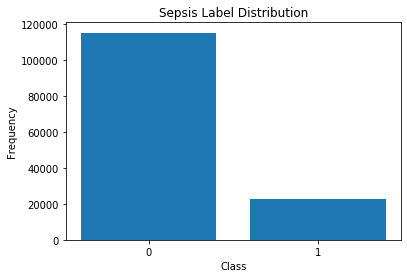

In [16]:
plt.bar(train_dropped['SepsisLabel'].value_counts().index, train_dropped['SepsisLabel'].value_counts())
plt.xticks([0, 1])
plt.xlabel('Class')
plt.title('Sepsis Label Distribution')
_ = plt.ylabel('Frequency')

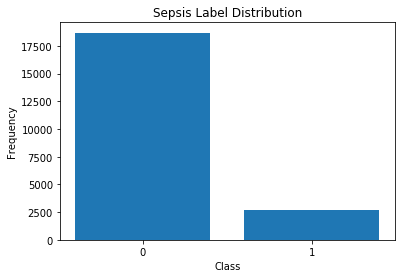

In [17]:
plt.bar(validation_dropped['SepsisLabel'].value_counts().index, validation_dropped['SepsisLabel'].value_counts())
plt.xticks([0, 1])
plt.xlabel('Class')
plt.title('Sepsis Label Distribution')
_ = plt.ylabel('Frequency')

## **Feature Engineering**

In [0]:
#For Heart Rate
def feature_engineer_hr(train):
    train.loc[(train['HR'] >= 100) & (train['Age'] >= 10 ),
            'custom_hr'] = 'abnormal'
    train.loc[(train['HR'] < 100) & (train['HR'] > 60) & (train['Age'] >= 10 ),
            'custom_hr'] = 'normal'
    train.loc[(train['HR'] >= 70) & (train['HR'] < 190) & (train['Age'] < 10 ),
            'custom_hr'] = 'normal'
    train.loc[((train['HR'] < 70) | (train['HR'] >= 190)) & (train['Age'] < 10 ),
            'custom_hr'] = 'abnormal'
    train['custom_hr'].fillna('Missing', inplace=True)
    return train

In [0]:
def feature_engineer_temp(train):
    train.loc[(train['Temp'] >= 36.4) & (train['Temp'] < 37.6), 
            'custom_temp'] = 'normal'
    train.loc[(train['Temp'] < 36.4) | (train['Temp'] >= 37.6), 
            'custom_temp'] = 'abnormal'

    train['custom_temp'].fillna('Missing', inplace=True)
    return train

In [0]:
#For Age
def featuer_engineer_age(train):
    train.loc[train['Age'] >=65, 'custom_age'] = 'old'
    train.loc[train['Age'] <1, 'custom_age'] = 'infant'
    train.loc[(train['Age'] >=1) & (train['Age'] <65), 
            'custom_age'] = 'child/adult'
    return train

In [0]:
#For O2stat
def feature_engineer_o2stat(train):
    train.loc[(train['O2Sat'] >= 90) & (train['O2Sat'] < 100), 
            'custom_o2stat'] = 'normal'
    train.loc[(train['O2Sat'] < 90) & (train['O2Sat'] >= 0), 
            'custom_o2stat'] = 'abnormal'

    train['custom_o2stat'].fillna('Missing', inplace=True)
    return train

In [0]:
#For SBP & DBP
def feature_engineer_blood_pressure(train):
    train.loc[(train['SBP'] <90) & (train['DBP'] <60), 'custom_bp'] = 'low'

    train.loc[(train['SBP'].between(90,120, inclusive=True)) & 
            (train['DBP'].between(60,80, inclusive=True)), 
            'custom_bp'] = 'normal'


    train.loc[(train['SBP'].between(120,140, inclusive=True)) & 
            (train['DBP'].between(80,90, inclusive=True)), 
            'custom_bp'] = 'elevated'


    train.loc[(train['SBP'] > 140 ) & 
            (train['DBP'] > 90 ), 'custom_bp'] = 'high'

    train['custom_bp'].fillna('Missing', inplace=True)
    return train

In [0]:
#For RP
def feature_engineer_resp_rate(train):
    train.loc[(train['Resp'].between(30,60)) & (train['Age'] <1), 
            'custom_resp'] = 'normal'
    train.loc[((train['Resp'] < 30) | (train['Resp'] > 60)) & 
             (train['Age'] <1) ,'custom_resp'] = 'abnormal'


    train.loc[(train['Resp'].between(24,40)) & (train['Age'].between(1,3)), 
            'custom_resp'] = 'normal'
    train.loc[((train['Resp'] < 24) | (train['Resp'] > 40)) & 
             (train['Age'].between(1,3)) ,'custom_resp'] = 'abnormal'


    train.loc[(train['Resp'].between(22,34)) & (train['Age'].between(3,6)), 
            'custom_resp'] = 'normal'
    train.loc[((train['Resp'] < 22) | (train['Resp'] > 34)) & 
             (train['Age'].between(3,6)) ,'custom_resp'] = 'abnormal'


    train.loc[(train['Resp'].between(18,30)) & (train['Age'].between(6,12)), 
            'custom_resp'] = 'normal'
    train.loc[((train['Resp'] < 18) | (train['Resp'] > 30)) & 
             (train['Age'].between(6,12)) ,'custom_resp'] = 'abnormal'


    train.loc[(train['Resp'].between(12,20)) & (train['Age'] >12), 
            'custom_resp'] = 'normal'
    train.loc[((train['Resp'] < 12) | (train['Resp'] > 20)) & (train['Age'] >12),
            'custom_resp'] = 'abnormal'

    train['custom_resp'].fillna('Missing', inplace=True)


    return train

In [0]:
train = featuer_engineer_age(train_dropped)
train = feature_engineer_blood_pressure(train_dropped)
train = feature_engineer_hr(train_dropped)
train = feature_engineer_o2stat(train_dropped)
train = feature_engineer_temp(train_dropped)
train = feature_engineer_resp_rate(train_dropped)



val = featuer_engineer_age(validation_dropped)
val = feature_engineer_blood_pressure(validation_dropped)
val = feature_engineer_hr(validation_dropped)
val = feature_engineer_o2stat(validation_dropped)
val = feature_engineer_temp(validation_dropped)
val = feature_engineer_resp_rate(validation_dropped)

In [0]:
filtered_columns = ['Gender', 'custom_hr', 'custom_temp','custom_age', 
                    'custom_o2stat', 'custom_bp','custom_resp' ,'ICULOS', 
                    'HospAdmTime']

X_train  = train[filtered_columns]
y_train = train['SepsisLabel']

X_val  = val[filtered_columns]
y_val = val['SepsisLabel']

In [0]:
categorical = X_train.dtypes == object

categorical['Gender'] = True

In [0]:
cat_pipeline = make_pipeline( OneHotEncoder(handle_unknown="ignore"))
cont_scale_pipeline = make_pipeline(SimpleImputer(strategy = "median"),
                                    StandardScaler())

preprocess_trans_scale = make_column_transformer((cont_scale_pipeline, 
                                                  ~categorical), 
                                                 (cat_pipeline, categorical))

In [0]:
def score_model(model, metric_list, y_true, y_pred):
    metric_dict = {'precision' :  precision_score, 'recall' : recall_score, 
                 'confusion_matrix' : confusion_matrix, 
                 'avg_precision': average_precision_score}
    df = pd.DataFrame()
    df['model'] = [model]
    for metric in metric_list:
        df[metric] = [metric_dict[metric](y_true, y_pred)]
    return df

## **Logistic Regression**

In [0]:
log_pipe_scale = make_pipeline(preprocess_trans_scale, 
                               LogisticRegression(C=0.01, solver = 'lbfgs',
                                                  dual=False) )

log_model = log_pipe_scale.fit(X_train, y_train)

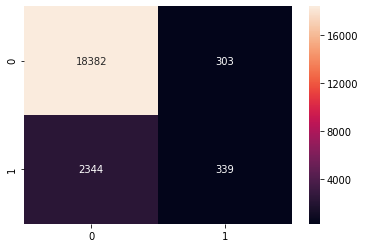

In [61]:
pred = log_pipe_scale.predict(X_val)
conf_matrix = confusion_matrix(y_val, pred)

sns.heatmap(conf_matrix, annot=True, fmt="d");

In [62]:
score_model('Logistic_regression', ['recall','precision', 'avg_precision'],
            y_val, pred)

model    recall  precision  avg_precision
0  Logistic_regression  0.126351   0.528037       0.176415

## **Decision Model**

In [0]:
dt_pipe_scale = make_pipeline(preprocess_trans_scale, DecisionTreeClassifier() )

dt_model = dt_pipe_scale.fit(X_train, y_train)

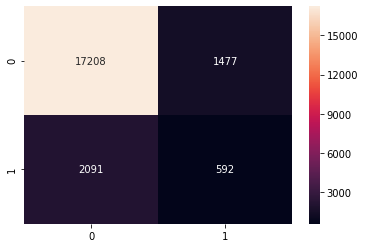

In [73]:
pred = dt_model.predict(X_val)
conf_matrix = confusion_matrix(y_val, pred)

sns.heatmap(conf_matrix, annot=True, fmt="d");

In [74]:
score_model('Decision_Tree', ['recall','precision', 'avg_precision'],
            y_val, pred)

model    recall  precision  avg_precision
0  Decision_Tree  0.220649   0.286129        0.16099

In [75]:
cat_names = preprocess_trans_scale.fit(X_train). \
            named_transformers_['pipeline-2'].named_steps['onehotencoder']

feature_list = list(cat_names.get_feature_names())
feature_list.extend(['ICULOS', 
                    'HospAdmTime'])


export_graphviz(DecisionTreeClassifier(max_leaf_nodes=15).fit( \
    preprocess_trans_scale.fit_transform(X_train), y_train) , 
                out_file='dt.dot',
                feature_names =feature_list ,class_names = ['normal','sepsis'],
                rounded = True, proportion = False, precision = 2
               )
call(['dot', '-Tpng', 'dt.dot', '-o', 'dt.png', '-Gdpi=600'])

Image(filename = 'dt.png', width =400, height = 400)

In [76]:
param_grid = { 'decisiontreeclassifier__max_depth': range(1, 7),
                'decisiontreeclassifier__max_leaf_nodes':range(2, 20)}
grid = GridSearchCV(dt_pipe_scale, param_grid, cv=3, n_jobs = 6, scoring= 'recall')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                  

In [77]:
print(grid.best_params_)

{'decisiontreeclassifier__max_depth': 1, 'decisiontreeclassifier__max_leaf_nodes': 2}


In [0]:
imp_list = dt_model.named_steps['decisiontreeclassifier'].feature_importances_

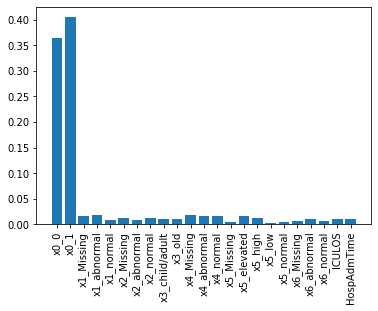

In [79]:
_ = plt.bar(feature_list,imp_list)
_ = plt.xticks(feature_list, rotation=90)

In [0]:
dt_pipe_scale = make_pipeline(preprocess_trans_scale, DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17) )

dt_model = dt_pipe_scale.fit(X_train, y_train)

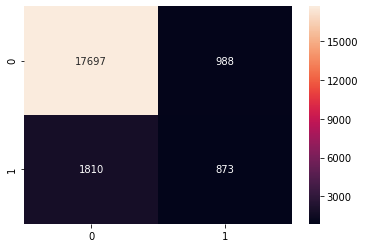

In [81]:
pred = dt_pipe_scale.predict(X_val)
conf_matrix = confusion_matrix(y_val, pred)

sns.heatmap(conf_matrix, annot=True, fmt="d");

## **Gradient Boosting**

In [0]:
gb_pipe_scale = make_pipeline(preprocess_trans_scale, GradientBoostingClassifier(n_estimators=50))

gb_model = gb_pipe_scale.fit(X_train, y_train)

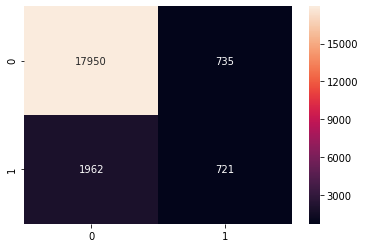

In [83]:

pred = gb_model.predict(X_val)
conf_matrix = confusion_matrix(y_val, pred)

sns.heatmap(conf_matrix, annot=True, fmt="d");

In [84]:
score_model('Gradient Boosting', ['recall','precision', 'avg_precision'],
            y_val, pred)

model    recall  precision  avg_precision
0  Gradient Boosting  0.268729   0.495192       0.224892

In [85]:
param_grid = {'gradientboostingclassifier__learning_rate': [0.1,0.01, 0.001, 0.25],
                'gradientboostingclassifier__n_estimators': [10,50,100,150]}
grid = GridSearchCV(gb_pipe_scale, param_grid, cv=3, n_jobs = 6, scoring= 'average_precision')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                  

In [86]:
grid.best_params_

{'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__n_estimators': 50}

In [109]:
accuracy_score(y_val, pred)

0.8744384125795582

## **Random Forest**

In [0]:
rf_pipe_scale = make_pipeline(preprocess_trans_scale, RandomForestClassifier(max_features='sqrt', n_estimators=150))

rf_model = rf_pipe_scale.fit(X_train, y_train)

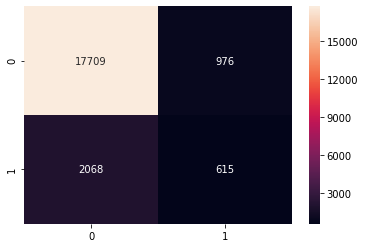

In [88]:
pred = rf_model.predict(X_val)
conf_matrix = confusion_matrix(y_val, pred)

sns.heatmap(conf_matrix, annot=True, fmt="d");

In [89]:
score_model('Random Forest', ['recall','precision', 'avg_precision'],
            y_val, pred)

model    recall  precision  avg_precision
0  Random Forest  0.229221   0.386549       0.185385

In [108]:
accuracy_score(y_val, pred)

0.8744384125795582

## **LightGBM**

In [92]:
param_grid = {'randomforestclassifier__max_features': ['auto','sqrt','log2'],
                'randomforestclassifier__n_estimators': [10,50,100,150]}
grid = GridSearchCV(rf_pipe_scale, param_grid, cv=3, n_jobs = 6, scoring= 'average_precision')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                  

In [93]:
grid.best_params_

{'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__n_estimators': 150}

In [0]:
X_train_transformed = preprocess_trans_scale.fit_transform(X_train)
d_train = lgb.Dataset(X_train_transformed, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

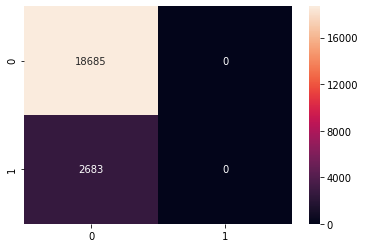

In [98]:
pred = clf.predict(preprocess_trans_scale.transform(X_val))
pred[pred <0.5] = 0
pred[pred >=0.5] = 1

conf_matrix = confusion_matrix(y_val, pred)

sns.heatmap(conf_matrix, annot=True, fmt="d");

In [106]:
score_model('Light GBM', ['recall','precision', 'avg_precision'],
            y_val, pred)

model  recall  precision  avg_precision
0  Light GBM     0.0        0.0       0.125562

In [107]:
accuracy_score(y_val, pred)

0.8744384125795582